In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
link = 'https://drive.google.com/file/d/1VWHKlhNASwSabG_MN9O0itOZ9ZaXUA4e/view?usp=sharing'

import pandas as pd

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('internship_dataset.csv')

df = pd.read_csv('internship_dataset.csv')
df.head()

,Unnamed: 0,national_inv,lead_time,pieces_past_due,perf_6_month_avg,in_transit_qty,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0,0.0,7.87,0.0,-99.00,0.0,0.0,0,0,0,1,0,0
1,1,2.0,9.00,0.0,0.99,0.0,0.0,0,0,0,1,0,0
2,2,2.0,7.87,0.0,-99.00,0.0,0.0,1,0,0,1,0,0
3,3,7.0,8.00,0.0,0.10,0.0,0.0,0,0,0,1,0,0
4,4,8.0,7.87,0.0,-99.00,0.0,0.0,1,0,0,1,0,0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df.isnull().sum()

Unnamed: 0           0
national_inv         0
lead_time            0
pieces_past_due      0
perf_6_month_avg     0
in_transit_qty       0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

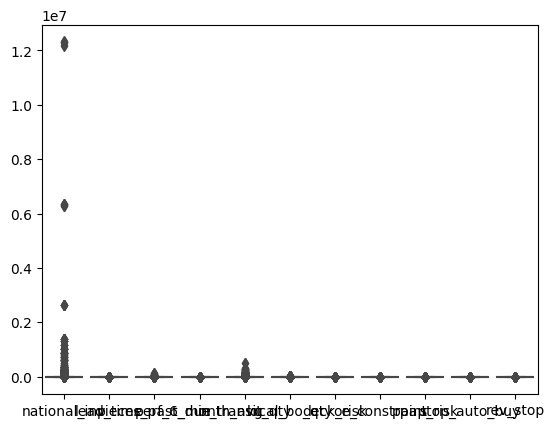

In [8]:
numerical_cols = ['national_inv', 'lead_time', 'pieces_past_due','perf_6_month_avg','in_transit_qty','local_bo_qty','deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop']
sns.boxplot(data=df[numerical_cols])
plt.show()#no outliers as we can see.

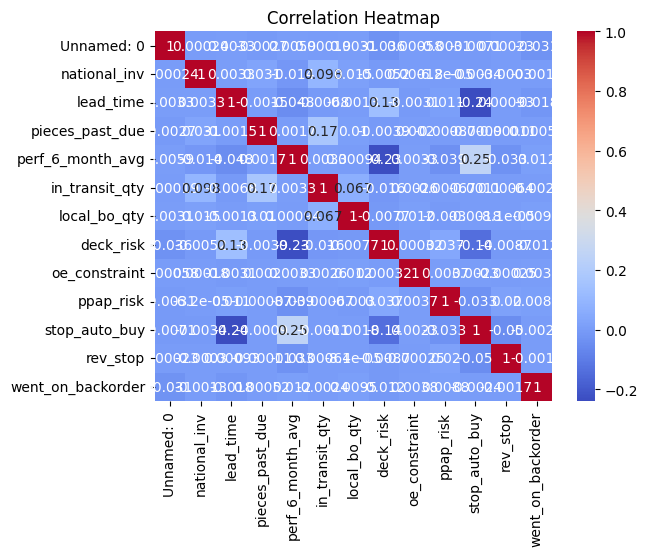

In [9]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
!pip install pandas-profiling
import pandas_profiling
profile = df.profile_report(title='Pandas Profiling Report')
profile.to_file("report.html")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 80.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=78be749cf0a43504d0a8c7fd52ddb4b10d2a25c1bbfb0d5c3a2ad9c1f16838c7
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

<ipython-input-10-727fd6b5ccf3>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
from google.colab import files
files.download('report.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>